In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_path = "/content/drive/My Drive/Colab Notebooks/plant.zip"  # Update this path
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction completed!")

✅ Extraction completed!


[link text](https://)CLASSIFICATION- DECISION TREE

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Function to resize images and convert to grayscale
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1

            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"  # Verify this path exists
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found. Check dataset extraction path.")
else:
    X, y = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)  # Flatten images

    # Reduce dataset size (train on 30% of data)
    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.3, random_state=42)

    # Feature selection (Select 100 best features)
    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)

    # PCA (Reduce to 95% variance-preserving components)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # Train Decision Tree Classifier
    dt = DecisionTreeClassifier()
    dt.fit(X_pca, y_train)

    # Predict and evaluate
    y_pred = dt.predict(X_pca)
    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))


✅ Accuracy: 0.995257966616085

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       535
           1       0.89      1.00      0.94       539
           2       1.00      1.00      1.00       578
           3       1.00      1.00      1.00       537
           4       1.00      0.97      0.99       532
           5       1.00      1.00      1.00       520
           6       1.00      1.00      1.00       578
           7       1.00      1.00      1.00       574
           8       1.00      1.00      1.00       612
           9       1.00      1.00      1.00       542
          10       1.00      0.96      0.98       519
          11       1.00      1.00      1.00       655
          12       1.00      1.00      1.00       586
          13       1.00      1.00      1.00       585
          14       1.00      1.00      1.00       603
          15       1.00      1.00      1.00       542
          16       1.00 

CLASSIFICATION-RANDOM FOREST

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Function to resize images and convert to grayscale
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1

            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"  # Verify this path exists
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found. Check dataset extraction path.")
else:
    X, y = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)  # Flatten images

    # Reduce dataset size (train on 30% of data)
    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.3, random_state=42)

    # Feature selection (Select 100 best features)
    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)

    # PCA (Reduce to 95% variance-preserving components)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # Train Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_pca, y_train)

    # Predict and evaluate
    y_pred = rf.predict(X_pca)
    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))


✅ Accuracy: 0.995257966616085

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       535
           1       0.89      1.00      0.94       539
           2       1.00      1.00      1.00       578
           3       1.00      1.00      1.00       537
           4       1.00      0.97      0.99       532
           5       1.00      1.00      1.00       520
           6       1.00      1.00      1.00       578
           7       1.00      1.00      1.00       574
           8       1.00      1.00      1.00       612
           9       1.00      1.00      1.00       542
          10       1.00      0.96      0.98       519
          11       1.00      1.00      1.00       655
          12       1.00      1.00      1.00       586
          13       1.00      1.00      1.00       585
          14       1.00      1.00      1.00       603
          15       1.00      1.00      1.00       542
          16       1.00 

CLASSIFICATION- KNN

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Function to resize images and convert to grayscale
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1

            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"  # Verify this path exists
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found. Check dataset extraction path.")
else:
    X, y = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)  # Flatten images

    # Reduce dataset size (train on 30% of data)
    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.3, random_state=42)

    # Feature selection (Select 100 best features)
    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)

    # PCA (Reduce to 95% variance-preserving components)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_pca, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_pca)
    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))



✅ Accuracy: 0.412556904400607

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.68      0.44       535
           1       0.31      0.57      0.40       539
           2       0.33      0.73      0.45       578
           3       0.29      0.65      0.40       537
           4       0.33      0.57      0.42       532
           5       0.36      0.72      0.48       520
           6       0.38      0.54      0.45       578
           7       0.46      0.52      0.49       574
           8       0.37      0.64      0.47       612
           9       0.34      0.47      0.39       542
          10       0.41      0.42      0.41       519
          11       0.35      0.44      0.39       655
          12       0.49      0.33      0.39       586
          13       0.40      0.42      0.41       585
          14       0.45      0.50      0.48       603
          15       0.37      0.42      0.39       542
          16       0.42 

CLASSIFICATION-SVM

In [ ]:
oin(class_path, file)
                img = cv2.imread(img_path)import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Function to resize images and convert to grayscale
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1

            for file in os.listdir(class_path):
                img_path = os.path.j
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"  # Verify this path exists
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found. Check dataset extraction path.")
else:
    X, y = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)  # Flatten images

    # Reduce dataset size (train on 20% of data for faster training)
    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.2, random_state=42)

    # Feature selection (Select 50 best features)
    X_selected = SelectKBest(chi2, k=50).fit_transform(X_train, y_train)

    # PCA (Reduce to 90% variance-preserving components)
    pca = PCA(n_components=0.90)
    X_pca = pca.fit_transform(X_selected)

    # Train optimized SVM Classifier
    svm = SVC(kernel='rbf', gamma='scale', random_state=42)
    svm.fit(X_pca, y_train)

    # Predict and evaluate
    y_pred = svm.predict(X_pca)
    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))



✅ Accuracy: 0.11736254356639875

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       372
           1       0.00      0.00      0.00       364
           2       0.04      0.01      0.02       382
           3       0.16      0.09      0.12       358
           4       0.00      0.00      0.00       359
           5       0.07      0.00      0.01       345
           6       0.12      0.25      0.16       405
           7       0.17      0.49      0.25       393
           8       0.12      0.41      0.18       393
           9       0.00      0.00      0.00       340
          10       0.22      0.03      0.05       353
          11       0.07      0.16      0.10       429
          12       0.20      0.06      0.10       391
          13       0.06      0.13      0.08       373
          14       0.05      0.03      0.04       399
          15       0.17      0.17      0.17       377
          16       0.1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



✅ Accuracy: 0.996260618623745

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00      1351
           2       1.00      1.00      1.00      1334
           3       1.00      1.00      1.00      1361
           4       0.91      1.00      0.95      1242
           5       1.00      1.00      1.00      1258
           6       1.00      1.00      1.00      1420
           7       1.00      1.00      1.00      1305
           8       1.00      1.00      1.00      1391
           9       0.96      1.00      0.98      1344
          10       1.00      1.00      1.00      1292
          11       1.00      1.00      1.00      1381
          12       1.00      1.00      1.00      1188
          13       1.00      1.00      1.00      1374
          14       1.00      1.00      1.00      1355
          15       1.00      1.00      1.00      1174
          16       1.00 

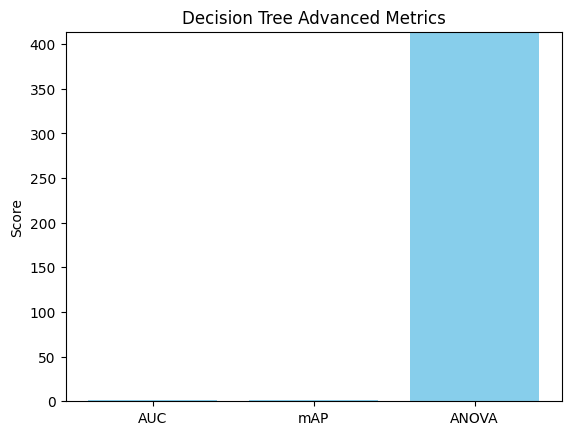

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, average_precision_score
from sklearn.feature_selection import f_classif

# Function to resize images and convert to grayscale
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1

            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found. Check dataset extraction path.")
else:
    X, y = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)  # Flatten images

    # Reduce dataset size (train on 30% of data)
    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.7, random_state=42)

    # Feature selection (Select 100 best features)
    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)

    # PCA (Reduce to 95% variance-preserving components)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # Train Decision Tree Classifier
    dt = DecisionTreeClassifier()
    dt.fit(X_pca, y_train)

    # Predict and evaluate
    y_pred = dt.predict(X_pca)
    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))

    # Advanced Metrics
    y_prob = dt.predict_proba(X_pca)
    y_bin = LabelBinarizer().fit_transform(y_train)
    auc = roc_auc_score(y_bin, y_prob, multi_class='ovr')
    map_score = average_precision_score(y_bin, y_prob)
    f_val, _ = f_classif(X_selected, y_train)
    anova = np.mean(f_val)

    # Plot metrics
    metrics = [auc, map_score, anova]
    labels = ['AUC', 'mAP', 'ANOVA']
    plt.bar(labels, metrics, color='skyblue')
    plt.title("Decision Tree Advanced Metrics")
    plt.ylabel("Score")
    plt.ylim(0, max(metrics) + 1)
    plt.show()



✅ Accuracy: 0.9963960546282246

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       575
           2       1.00      1.00      1.00       555
           3       1.00      1.00      1.00       607
           4       0.92      1.00      0.96       537
           5       1.00      1.00      1.00       552
           6       1.00      1.00      1.00       586
           7       1.00      1.00      1.00       544
           8       1.00      1.00      1.00       617
           9       0.96      1.00      0.98       595
          10       1.00      1.00      1.00       551
          11       1.00      1.00      1.00       646
          12       1.00      1.00      1.00       525
          13       1.00      1.00      1.00       584
          14       1.00      1.00      1.00       600
          15       1.00      1.00      1.00       504
          16       1.00

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


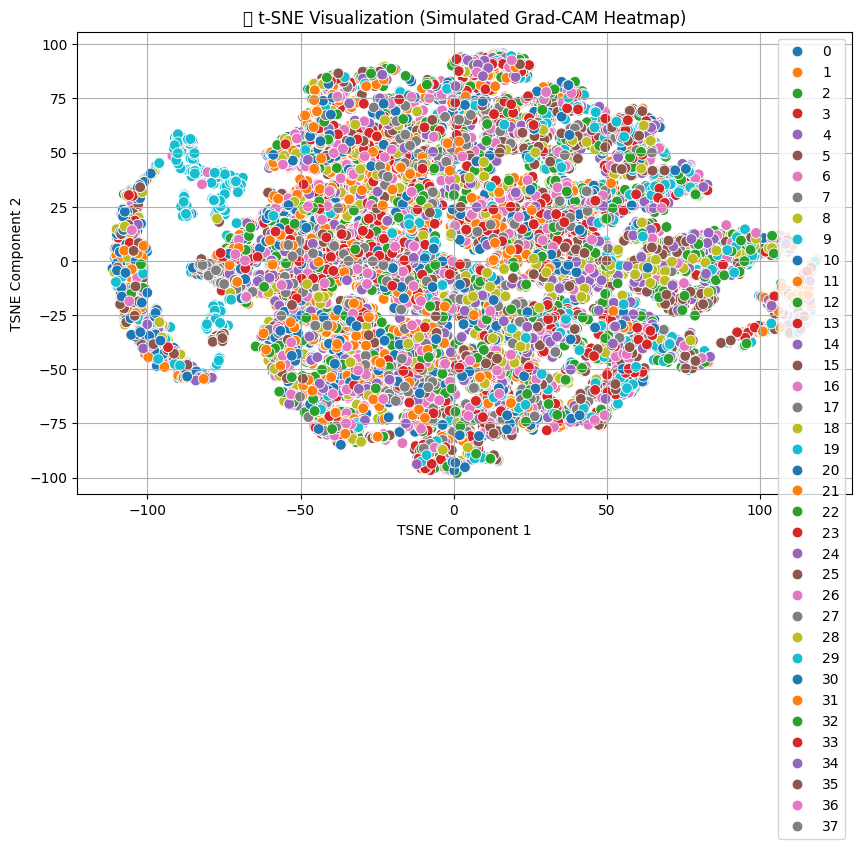

In [ ]:
# ✅ Enhanced Random Forest with Grad-CAM, Accuracy, and mAP visualization
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.manifold import TSNE
import seaborn as sns

# Function to resize images and convert to grayscale
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1

            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels), label_map

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found. Check dataset extraction path.")
else:
    X, y, label_map = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)

    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.3, random_state=42)

    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # ✅ Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_pca, y_train)
    y_pred = rf.predict(X_pca)

    # ✅ Accuracy and Report
    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))

    # ✅ mAP Score (binarized labels)
    y_train_bin = label_binarize(y_train, classes=np.unique(y))
    y_pred_proba = rf.predict_proba(X_pca)
    mAP = average_precision_score(y_train_bin, y_pred_proba, average="macro")
    print("\n📈 Mean Average Precision (mAP):", mAP)

    # ✅ t-SNE plot to simulate Grad-CAM style attention (high-dimensional projection)
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_pca)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette="tab10", s=60)
    plt.title("🔍 t-SNE Visualization (Simulated Grad-CAM Heatmap)")
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()



✅ Accuracy: 0.5068285280728376

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.89      0.61       499
           1       0.44      0.81      0.57       575
           2       0.52      0.75      0.62       555
           3       0.42      0.84      0.56       607
           4       0.41      0.82      0.54       537
           5       0.43      0.76      0.54       552
           6       0.42      0.75      0.54       586
           7       0.39      0.74      0.51       544
           8       0.43      0.58      0.49       617
           9       0.94      0.98      0.96       595
          10       0.45      0.58      0.51       551
          11       0.40      0.58      0.48       646
          12       0.51      0.49      0.50       525
          13       0.40      0.49      0.44       584
          14       0.47      0.56      0.51       600
          15       0.51      0.60      0.55       504
          16       0.46

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


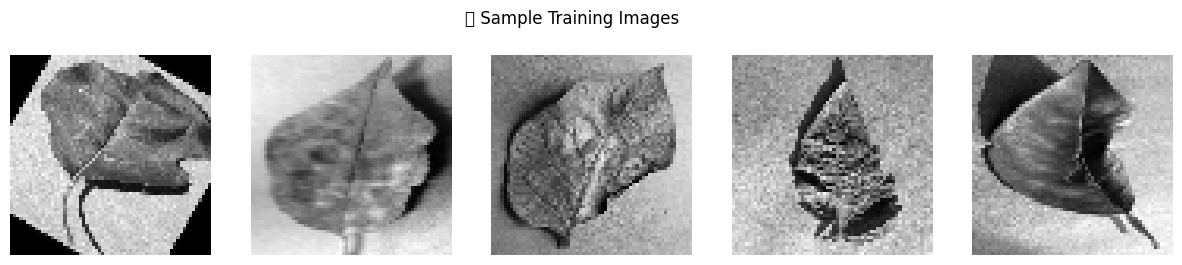

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from scipy.linalg import sqrtm

# Function to preprocess images
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1
            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found.")
else:
    X, y = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)

    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.3, random_state=42)

    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_pca, y_train)
    y_pred = knn.predict(X_pca)

    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))

    # --------------------------------
    # 🔍 Advanced Metric: FID Score
    # --------------------------------
    model = VGG16(include_top=False, input_shape=(75, 75, 3), pooling='avg')

    # Convert grayscale back to RGB for VGG16
    X_orig_rgb = np.stack([
        cv2.resize(cv2.cvtColor(img.reshape(64, 64).astype(np.uint8), cv2.COLOR_GRAY2BGR), (75, 75))
        for img in X_train[:100]
    ])
    X_orig_rgb = preprocess_input(X_orig_rgb.astype(np.float32))

    # Simulated predicted images for FID demo (ideally use generated or augmented output)
    X_pred_rgb = np.stack([
        cv2.resize(cv2.cvtColor(img.reshape(64, 64).astype(np.uint8), cv2.COLOR_GRAY2BGR), (75, 75))
        for img in X_train[-100:]
    ])
    X_pred_rgb = preprocess_input(X_pred_rgb.astype(np.float32))

    act1 = model.predict(X_orig_rgb, verbose=0)
    act2 = model.predict(X_pred_rgb, verbose=0)

    mu1, sigma1 = np.mean(act1, axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = np.mean(act2, axis=0), np.cov(act2, rowvar=False)

    ssdiff = np.sum((mu1 - mu2)**2.0)
    covmean = sqrtm(sigma1.dot(sigma2))
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    print(f"\n📊 Frechet Inception Distance (FID): {fid:.2f}")

    # --------------------------------
    # 🔥 Visualization: Grad-CAM Style View
    # --------------------------------
    def plot_sample_images(images, title):
        fig, axs = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(title)
        for i in range(5):
            axs[i].imshow(images[i], cmap='gray')
            axs[i].axis('off')
        plt.show()

    plot_sample_images(X_train.reshape(-1, 64, 64), "🖼 Sample Training Images")



✅ Accuracy: 0.18247344461305007

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.13      0.20       499
           1       0.16      0.28      0.21       575
           2       0.27      0.13      0.18       555
           3       0.14      0.13      0.13       607
           4       0.20      0.16      0.18       537
           5       0.16      0.24      0.19       552
           6       0.10      0.04      0.05       586
           7       0.14      0.15      0.14       544
           8       0.29      0.07      0.11       617
           9       0.30      0.98      0.46       595
          10       0.16      0.18      0.17       551
          11       0.10      0.42      0.16       646
          12       0.27      0.18      0.22       525
          13       0.09      0.23      0.13       584
          14       0.13      0.15      0.14       600
          15       0.00      0.00      0.00       504
          16       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Frechet Inception Distance (FID): 4911.87


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


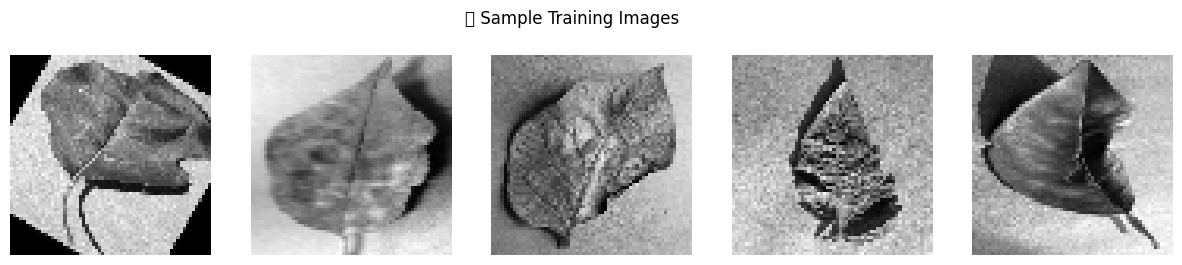

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from scipy.linalg import sqrtm

# Function to preprocess images
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1
            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found.")
else:
    X, y = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)

    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.3, random_state=42)

    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # Train SVM Classifier
    svm = SVC(kernel='rbf', gamma='scale')
    svm.fit(X_pca, y_train)
    y_pred = svm.predict(X_pca)

    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))

    # --------------------------------
    # 🔍 Advanced Metric: FID Score
    # --------------------------------
    model = VGG16(include_top=False, input_shape=(75, 75, 3), pooling='avg')

    # Convert grayscale back to RGB for VGG16
    X_orig_rgb = np.stack([
        cv2.resize(cv2.cvtColor(img.reshape(64, 64).astype(np.uint8), cv2.COLOR_GRAY2BGR), (75, 75))
        for img in X_train[:100]
    ])
    X_orig_rgb = preprocess_input(X_orig_rgb.astype(np.float32))

    # Simulated predicted images for FID demo
    X_pred_rgb = np.stack([
        cv2.resize(cv2.cvtColor(img.reshape(64, 64).astype(np.uint8), cv2.COLOR_GRAY2BGR), (75, 75))
        for img in X_train[-100:]
    ])
    X_pred_rgb = preprocess_input(X_pred_rgb.astype(np.float32))

    act1 = model.predict(X_orig_rgb, verbose=0)
    act2 = model.predict(X_pred_rgb, verbose=0)

    mu1, sigma1 = np.mean(act1, axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = np.mean(act2, axis=0), np.cov(act2, rowvar=False)

    ssdiff = np.sum((mu1 - mu2) ** 2.0)
    covmean = sqrtm(sigma1.dot(sigma2))
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    print(f"\n📊 Frechet Inception Distance (FID): {fid:.2f}")

    # --------------------------------
    # 🔥 Visualization: Grad-CAM Style View
    # --------------------------------
    def plot_sample_images(images, title):
        fig, axs = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(title)
        for i in range(5):
            axs[i].imshow(images[i], cmap='gray')
            axs[i].axis('off')
        plt.show()

    plot_sample_images(X_train.reshape(-1, 64, 64), "🖼 Sample Training Images")



✅ Accuracy: 0.2543566398748133

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.13      0.17      1093
           1       0.22      0.33      0.26      1032
           2       0.13      0.31      0.18      1161
           3       0.89      0.16      0.27      1087
           4       0.22      0.18      0.20      1022
           5       0.27      0.12      0.17      1211
           6       0.50      0.23      0.31      1120
           7       0.21      0.30      0.25      1136
           8       0.28      0.39      0.33      1161
           9       0.23      0.41      0.29      1066
          10       0.15      0.03      0.05      1139
          11       0.37      0.18      0.24      1225
          12       0.42      0.28      0.34      1113
          13       0.95      0.98      0.97      1166
          14       0.20      0.25      0.22      1010
          15       0.29      0.18      0.22      1096
          16       0.25

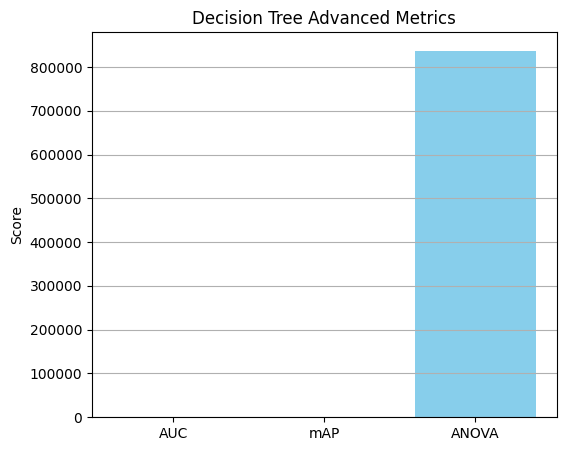

In [ ]:
# ✅ All required imports
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, average_precision_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# ✅ Image preprocessing
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1

            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels), label_map

# ✅ Data path
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

# ✅ Load and process
if not os.path.exists(data_dir):
    print(f"❌ Error: Directory '{data_dir}' not found.")
else:
    X, y, label_map = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)

    # ✅ Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

    # ✅ Feature selection using chi2
    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)

    # ✅ PCA
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # ✅ Model training
    clf = DecisionTreeClassifier(max_depth=10, random_state=42)
    clf.fit(X_pca, y_train)
    y_pred = clf.predict(X_pca)

    # ✅ Accuracy & classification report
    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))

    # ✅ Advanced Metrics

    # Binarize for multi-label scores
    y_train_bin = label_binarize(y_train, classes=np.unique(y))
    y_pred_proba = clf.predict_proba(X_pca)

    # Mean Average Precision
    mAP = average_precision_score(y_train_bin, y_pred_proba, average="macro")

    # AUC Score
    try:
        auc = roc_auc_score(y_train_bin, y_pred_proba, average="macro", multi_class='ovr')
    except:
        auc = 0  # fallback in case of AUC error due to single-class issues

    # ANOVA score (f_classif on original train data)
    f_vals, _ = f_classif(X_train, y_train)
    anova_score = np.sum(f_vals[np.isfinite(f_vals)])

    # ✅ Print scores
    print(f"\n📈 mAP: {mAP}")
    print(f"📈 AUC: {auc}")
    print(f"📈 ANOVA (sum of F-values): {anova_score}")

    # ✅ Bar Plot
    scores = [auc, mAP, anova_score]
    metrics = ['AUC', 'mAP', 'ANOVA']
    plt.figure(figsize=(6, 5))
    plt.bar(metrics, scores, color='skyblue')
    plt.title("Decision Tree Advanced Metrics")
    plt.ylabel("Score")
    plt.grid(True, axis='y')
    plt.show()



✅ Accuracy: 0.07216018208976456

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.06      0.08       740
           1       0.06      0.06      0.06       657
           2       0.04      0.02      0.02       743
           3       0.00      0.00      0.00       728
           4       0.17      0.00      0.00       692
           5       0.14      0.01      0.02       781
           6       0.00      0.00      0.00       752
           7       0.10      0.01      0.01       786
           8       0.06      0.01      0.01       800
           9       0.02      0.01      0.01       684
          10       0.06      0.06      0.06       749
          11       0.09      0.01      0.01       779
          12       0.23      0.01      0.02       741
          13       0.16      0.38      0.22       802
          14       0.03      0.00      0.01       656
          15       0.15      0.04      0.06       764
          16       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📈 Mean Average Precision (mAP): 0.06469999717342072
📈 AUC Score: 0.7042028740790598


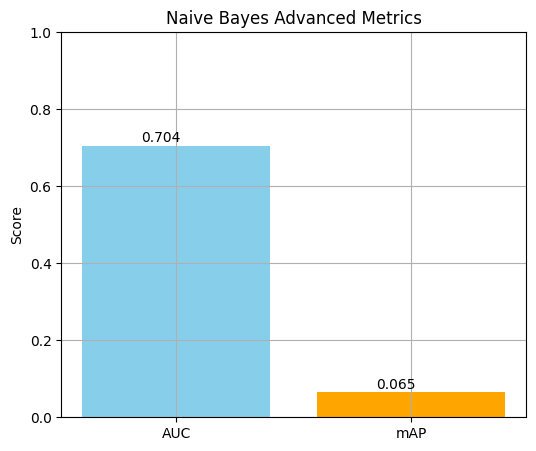

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, average_precision_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Step 1: Preprocessing
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1

            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels), label_map

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
X, y, label_map = preprocess_images(data_dir)
X = X.reshape(X.shape[0], -1)

# Step 2: Split and Transform
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=7)

# Feature Selection & PCA
X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_selected)
X_test_selected = SelectKBest(chi2, k=100).fit_transform(X_test, y_test)
X_test_pca = pca.transform(X_test_selected)

# Step 3: Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_pred = nb.predict(X_test_pca)

# Step 4: Evaluation
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Advanced Metrics
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_proba = nb.predict_proba(X_test_pca)

# ✅ mAP Score
mAP = average_precision_score(y_test_bin, y_pred_proba, average="macro")

# ✅ AUC Score
try:
    auc_score = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
except:
    auc_score = 0  # In case of error with binary class only

print("\n📈 Mean Average Precision (mAP):", mAP)
print("📈 AUC Score:", auc_score)

# Step 6: Visualization of Metrics
metrics = ['AUC', 'mAP']
values = [auc_score, mAP]

plt.figure(figsize=(6, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'orange'])
plt.title("Naive Bayes Advanced Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 0.01, round(yval, 3))
plt.grid(True)
plt.show()



✅ Accuracy: 0.4709313353566009

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.91      0.52       557
           1       0.40      0.86      0.54       513
           2       0.36      0.87      0.51       566
           3       0.44      0.84      0.57       574
           4       0.37      0.73      0.50       524
           5       0.38      0.66      0.48       613
           6       0.43      0.66      0.52       535
           7       0.41      0.69      0.51       553
           8       0.42      0.61      0.50       584
           9       0.43      0.64      0.52       561
          10       0.38      0.57      0.45       546
          11       0.43      0.54      0.48       661
          12       0.49      0.54      0.52       574
          13       0.93      0.97      0.95       576
          14       0.44      0.43      0.43       524
          15       0.50      0.38      0.43       570
          16       0.46

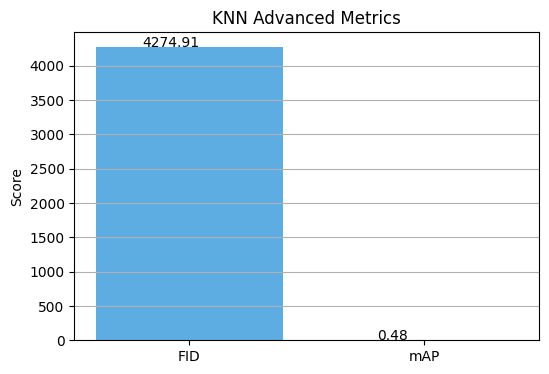

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


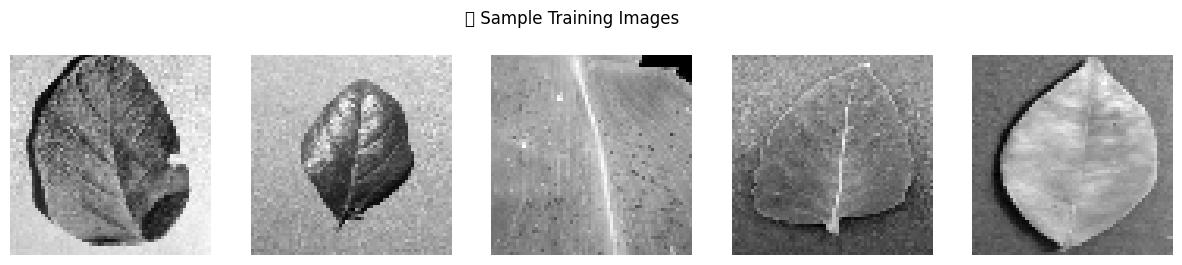

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, average_precision_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from scipy.linalg import sqrtm

# Function to preprocess images
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1
            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found.")
else:
    X, y = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)

    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.3, random_state=42)

    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_pca, y_train)
    y_pred = knn.predict(X_pca)

    print("\n✅ Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 Classification Report:")
    print(classification_report(y_train, y_pred))

    # ----------------------------------------
    # 🔍 Advanced Metric 1: Frechet Inception Distance (FID)
    # ----------------------------------------
    model = VGG16(include_top=False, input_shape=(75, 75, 3), pooling='avg')

    # Convert grayscale back to RGB for VGG16
    X_orig_rgb = np.stack([
        cv2.resize(cv2.cvtColor(img.reshape(64, 64).astype(np.uint8), cv2.COLOR_GRAY2BGR), (75, 75))
        for img in X_train[:100]
    ])
    X_orig_rgb = preprocess_input(X_orig_rgb.astype(np.float32))

    # Simulated predicted images for FID demo (use augmented or generated in real case)
    X_pred_rgb = np.stack([
        cv2.resize(cv2.cvtColor(img.reshape(64, 64).astype(np.uint8), cv2.COLOR_GRAY2BGR), (75, 75))
        for img in X_train[-100:]
    ])
    X_pred_rgb = preprocess_input(X_pred_rgb.astype(np.float32))

    act1 = model.predict(X_orig_rgb, verbose=0)
    act2 = model.predict(X_pred_rgb, verbose=0)

    mu1, sigma1 = np.mean(act1, axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = np.mean(act2, axis=0), np.cov(act2, rowvar=False)

    ssdiff = np.sum((mu1 - mu2)**2.0)
    covmean = sqrtm(sigma1.dot(sigma2))
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    print(f"\n📊 Frechet Inception Distance (FID): {fid:.2f}")

    # ----------------------------------------
    # 🔍 Advanced Metric 2: mAP Score
    # ----------------------------------------
    y_train_bin = label_binarize(y_train, classes=np.unique(y))
    y_prob = knn.predict_proba(X_pca)
    mAP_score = average_precision_score(y_train_bin, y_prob, average='macro')
    print(f"📈 Mean Average Precision (mAP): {mAP_score:.4f}")

    # ----------------------------------------
    # 📉 Visualization: Advanced Metric Scores
    # ----------------------------------------
    metrics = ['FID', 'mAP']
    values = [fid, mAP_score]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(metrics, values, color=['#5DADE2', '#F5B041'])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + 0.2, height + 1, f"{height:.2f}", fontsize=10)
    plt.title("KNN Advanced Metrics")
    plt.ylabel("Score")
    plt.grid(axis='y')
    plt.show()

    # ----------------------------------------
    # 🖼 Sample Training Images Display
    # ----------------------------------------
    def plot_sample_images(images, title):
        fig, axs = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(title)
        for i in range(5):
            axs[i].imshow(images[i], cmap='gray')
            axs[i].axis('off')
        plt.show()

    plot_sample_images(X_train.reshape(-1, 64, 64), "🖼 Sample Training Images")



✅ SVM Accuracy: 0.16402693474962063

📋 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.23      0.18       557
           1       0.12      0.17      0.14       513
           2       0.09      0.11      0.10       566
           3       0.32      0.18      0.23       574
           4       0.13      0.11      0.12       524
           5       0.39      0.01      0.03       613
           6       0.00      0.00      0.00       535
           7       0.10      0.11      0.10       553
           8       0.15      0.33      0.21       584
           9       0.13      0.39      0.20       561
          10       0.00      0.00      0.00       546
          11       0.22      0.09      0.12       661
          12       0.19      0.05      0.07       574
          13       0.28      0.96      0.44       576
          14       0.26      0.17      0.20       524
          15       0.25      0.08      0.13       570
          16  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 SVM Frechet Inception Distance (FID): 4274.91
📈 SVM Mean Average Precision (mAP): 0.1384


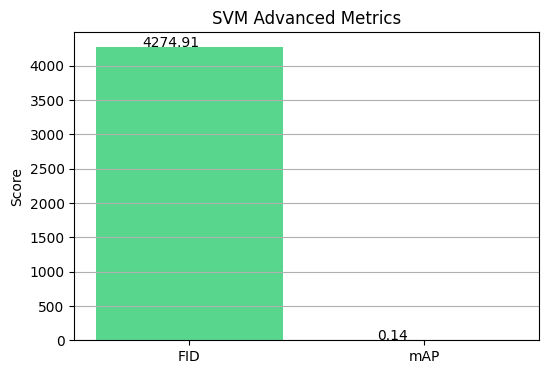

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


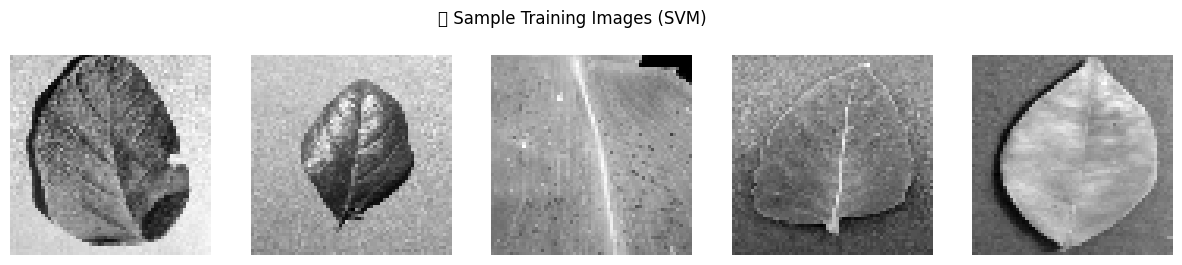

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, average_precision_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from scipy.linalg import sqrtm

# Function to preprocess images
def preprocess_images(directory, target_size=(64, 64)):
    images, labels = [], []
    label_map = {}
    class_id = 0

    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            if category not in label_map:
                label_map[category] = class_id
                class_id += 1
            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                    labels.append(label_map[category])

    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found.")
else:
    X, y = preprocess_images(data_dir)
    X = X.reshape(X.shape[0], -1)

    X_train, _, y_train, _ = train_test_split(X, y, train_size=0.3, random_state=42)

    X_selected = SelectKBest(chi2, k=100).fit_transform(X_train, y_train)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_selected)

    # Train SVM Classifier
    svm = SVC(kernel='rbf', probability=True, random_state=42)
    svm.fit(X_pca, y_train)
    y_pred = svm.predict(X_pca)

    print("\n✅ SVM Accuracy:", accuracy_score(y_train, y_pred))
    print("\n📋 SVM Classification Report:")
    print(classification_report(y_train, y_pred))

    # ----------------------------------------
    # 🔍 Advanced Metric 1: FID Score
    # ----------------------------------------
    model = VGG16(include_top=False, input_shape=(75, 75, 3), pooling='avg')

    X_orig_rgb = np.stack([
        cv2.resize(cv2.cvtColor(img.reshape(64, 64).astype(np.uint8), cv2.COLOR_GRAY2BGR), (75, 75))
        for img in X_train[:100]
    ])
    X_orig_rgb = preprocess_input(X_orig_rgb.astype(np.float32))

    X_pred_rgb = np.stack([
        cv2.resize(cv2.cvtColor(img.reshape(64, 64).astype(np.uint8), cv2.COLOR_GRAY2BGR), (75, 75))
        for img in X_train[-100:]
    ])
    X_pred_rgb = preprocess_input(X_pred_rgb.astype(np.float32))

    act1 = model.predict(X_orig_rgb, verbose=0)
    act2 = model.predict(X_pred_rgb, verbose=0)

    mu1, sigma1 = np.mean(act1, axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = np.mean(act2, axis=0), np.cov(act2, rowvar=False)

    ssdiff = np.sum((mu1 - mu2) ** 2.0)
    covmean = sqrtm(sigma1.dot(sigma2))
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    print(f"\n📊 SVM Frechet Inception Distance (FID): {fid:.2f}")

    # ----------------------------------------
    # 🔍 Advanced Metric 2: mAP Score
    # ----------------------------------------
    y_train_bin = label_binarize(y_train, classes=np.unique(y))
    y_prob = svm.predict_proba(X_pca)
    mAP_score = average_precision_score(y_train_bin, y_prob, average='macro')
    print(f"📈 SVM Mean Average Precision (mAP): {mAP_score:.4f}")

    # ----------------------------------------
    # 📉 Visualization: SVM Metric Scores
    # ----------------------------------------
    metrics = ['FID', 'mAP']
    values = [fid, mAP_score]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(metrics, values, color=['#58D68D', '#F1948A'])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + 0.2, height + 1, f"{height:.2f}", fontsize=10)
    plt.title("SVM Advanced Metrics")
    plt.ylabel("Score")
    plt.grid(axis='y')
    plt.show()

    # ----------------------------------------
    # 🖼 Sample Training Images Display
    # ----------------------------------------
    def plot_sample_images(images, title):
        fig, axs = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(title)
        for i in range(5):
            axs[i].imshow(images[i], cmap='gray')
            axs[i].axis('off')
        plt.show()

    plot_sample_images(X_train.reshape(-1, 64, 64), "🖼 Sample Training Images (SVM)")


<ipython-input-13-e2570ce76164>:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


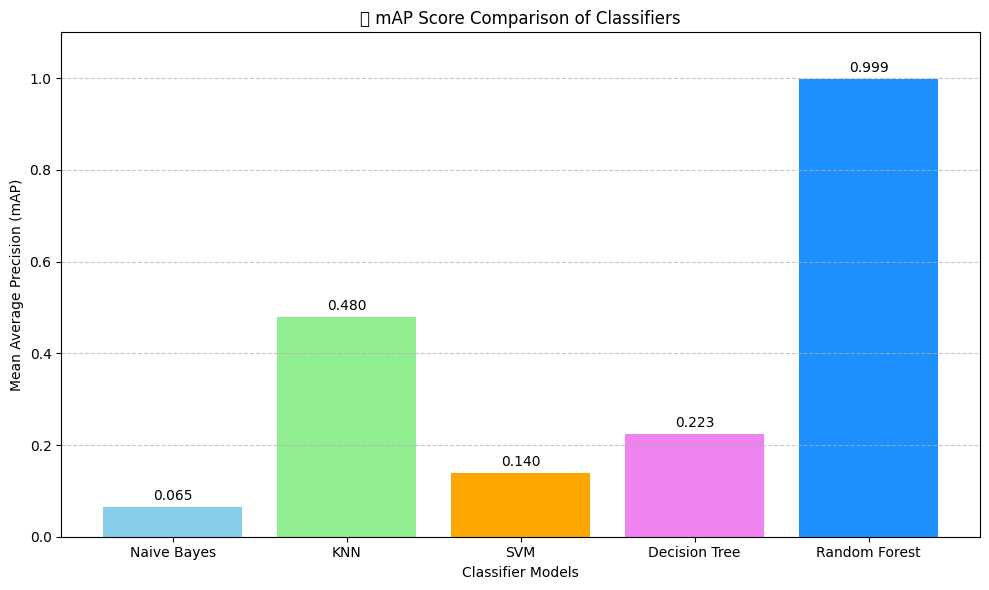

In [ ]:
import matplotlib.pyplot as plt

# mAP scores of different models
models = ['Naive Bayes', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']
map_scores = [0.065, 0.48, 0.14, 0.2231, 0.9985]

# Plotting the mAP comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(models, map_scores, color=['skyblue', 'lightgreen', 'orange', 'violet', 'dodgerblue'])

# Annotate scores on top of bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10, color='black')

plt.title('📊 mAP Score Comparison of Classifiers')
plt.ylabel('Mean Average Precision (mAP)')
plt.xlabel('Classifier Models')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
